In [ ]:
# Importing required libraries and packages
import json 
import numpy as np
import pandas as pd
import string
import nltk 
import random
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder



Data Preprocessing

In [ ]:
# Load and preprocess the data
with open('intents.json') as file:
  data1 = json.load(file)
# Getting all the dataset to list
questions = []
tags = []
responses = {}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for question in intent['questions']:
        questions.append(question)
        tags.append(intent['tag'])


In [ ]:
# Converting to data frame
data = pd.DataFrame({"questions":questions, "tags":tags})

In [ ]:
# Printing the data first few rows 
data.head()

,questions,tags
0,Hi,greeting
1,Hey,greeting
2,Is anyone there?,greeting
3,Hello,greeting
4,Hay,greeting


In [ ]:
# the original DataFrame "data" will have its rows shuffled randomly
data = data.sample(frac=1)

In [ ]:
#removing punctuations
data['questions'] = data["questions"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['questions'] = data["questions"].apply(lambda wrd: ''.join(wrd))
data

,questions,tags
206,when is clinical optometry 5 professional pra...,MOD007303
172,when is performance management assessment,MOD007167
47,when is theoretical and practical ophthalmic l...,MOD002467
121,when is professional and ethical practice asse...,MOD003455
153,advanced machine learning,MOD006566
...,...,...
22,i need a support,help
54,ophthalmic lenses 2,MOD002473
1,hey,greeting
163,when is diagnosis and formulation in mental he...,MOD007125


In [ ]:
# Tokenizing the data
vocab_size = 1000
embedding_dim = 16
max_len = 11
oov_token = "<OOV>"
# To vectorize the whole text data 
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(data['questions'])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(data['questions'])
# Apply padding to make all the training text sequence into the same size
x_train = pad_sequences(sequences)

In [ ]:
# To convert target label into a model understandable form (encoding the outputs)
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [ ]:
input_shape = x_train.shape[1]
print(input_shape)

11


In [ ]:
# define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words:" , vocabulary)
output_length = le.classes_.shape[0]
print('output length:' , output_length)

number of unique words: 184
output length: 72


Model Design and Training

In [ ]:
# Defining the model architecture and Creating the model using lstm
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(LSTM(32))
model.add(Dense(16, activation='relu'))
model.add(Dense(output_length, activation='softmax'))

# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

# Applying earlystopping to avoid model overfitting
earlystop_callback = EarlyStopping(monitor='loss', patience=5)
model.summary()

# training the model and saving it to trainlstm with 180 epochs
epochs = 180
trainlstm = model.fit(x_train, y_train, epochs=epochs, callbacks=[earlystop_callback])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 11, 16)            16000     
                                                                 
 lstm (LSTM)                 (None, 32)                6272      
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 72)                1224      
                                                                 
Total params: 24,024
Trainable params: 24,024
Non-trainable params: 0
_________________________________________________________________
Epoch 1/180
8/8 [==============================] - 15s 324ms/step - loss: 4.2770 - accuracy: 0.0177
Epoch 2/180
8/8 [==============================] - 3s 389ms/step - loss: 4.2745 - ac

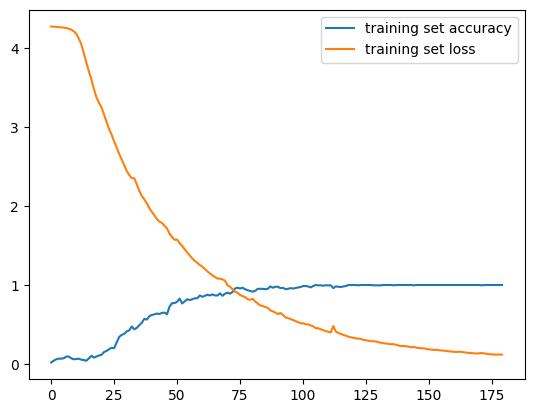

In [ ]:
# Model analysis- Plotting model accuracy
plt.plot(trainlstm.history['accuracy'],label='training set accuracy')
plt.plot(trainlstm.history['loss'],label='training set loss')
plt.legend()

In [ ]:
# Defining the model architecture and Creating the model using SimpleRNN
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(SimpleRNN(16))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(output_length, activation='softmax'))

# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

# Applying earlystopping to avoid model overfitting
earlystop_callback = EarlyStopping(monitor='loss', patience=5)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 11, 16)            16000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 72)                1224      
                                                                 
Total params: 18,296
Trainable params: 18,296
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model and saving it to train with 150 epochs
epochs = 150
train = model.fit(x_train, y_train, epochs=epochs, callbacks=[earlystop_callback])

Epoch 1/150
8/8 [==============================] - 3s 125ms/step - loss: 4.2765 - accuracy: 0.0177
Epoch 2/150
8/8 [==============================] - 1s 103ms/step - loss: 4.2675 - accuracy: 0.0354
Epoch 3/150
8/8 [==============================] - 1s 87ms/step - loss: 4.2583 - accuracy: 0.0398
Epoch 4/150
8/8 [==============================] - 0s 48ms/step - loss: 4.2478 - accuracy: 0.0487
Epoch 5/150
8/8 [==============================] - 1s 102ms/step - loss: 4.2334 - accuracy: 0.0664
Epoch 6/150
8/8 [==============================] - 1s 81ms/step - loss: 4.2159 - accuracy: 0.0487
Epoch 7/150
8/8 [==============================] - 0s 27ms/step - loss: 4.1932 - accuracy: 0.0575
Epoch 8/150
8/8 [==============================] - 0s 53ms/step - loss: 4.1670 - accuracy: 0.0752
Epoch 9/150
8/8 [==============================] - 1s 164ms/step - loss: 4.1355 - accuracy: 0.0442
Epoch 10/150
8/8 [==============================] - 0s 57ms/step - loss: 4.0955 - accuracy: 0.0664
Epoch 11/150
8/

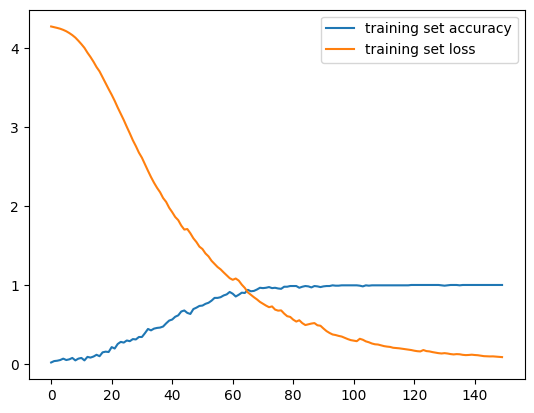

In [ ]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [ ]:
# to save the trained model
model.save("chat_model")

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(le, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

Model Testing and Evaluation

In [ ]:
#chatting
print("Start chatting with the bot (type quit to stop)!")
while True:
  texts_p = []
  prediction_input = input('User: ')
  if prediction_input == "quit":
    print("AruBot: Goodbye!")
    break
  
#Removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

#Tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)  
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

#getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

#finding the right tag and predictin
  response_tag = le.inverse_transform([output])[0]
  print('AruBot: ',random.choice(responses[response_tag]))
  
 

Start chatting with the bot (type quit to stop)!
User: hello
1/1 [==============================] - 0s 280ms/step
AruBot:  Hello
User: how are you
1/1 [==============================] - 0s 19ms/step
AruBot:  I'm AruBot, an Artificial Intelligent bot to give module assessment information
User: when is financial management exam
1/1 [==============================] - 0s 31ms/step
AruBot:  It's on 25th April, a Written exam at Cos 310 for surnames A-L and Cos 311 for surnames M-Z from 02pm to 05:15pm
User: when is financial mangement exam
1/1 [==============================] - 0s 19ms/step
AruBot:  Date:25/04/2023, Time:02:00pm-05:15pm, Description:Written, Venue: Cos 310 for surnames from A-L, Cos 311 for M-Z, 02:00pm-05:15pm
User: when is advance machine learning exam
1/1 [==============================] - 0s 27ms/step
AruBot:  02:00pm-04:00pm, 2023-04-25,a Written at Cos 207 for All
User: when is advanced machine learning exam
1/1 [==============================] - 0s 29ms/step
AruBot: 

Model Training with pre-defined Model (BERT)

In [ ]:
# Using train_test_split to split the dataset into train,test and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [ ]:
# Installing transformers
pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing the necessary libraries
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer

# Load the pre-trained BERT model and tokenizer
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Convert input data to tokenized format
input_text = "Hello, how are you?"
input_ids = bert_tokenizer.encode(input_text, max_length=11, truncation=True)

# Create the Keras model
input_layer = tf.keras.layers.Input(shape=(11,), dtype='int32')
transformer_layer = bert_model(input_layer)[0]
flatten_layer = tf.keras.layers.Flatten()(transformer_layer)
output_layer = tf.keras.layers.Dense(1, activation='softmax')(flatten_layer)
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compile and train the model
bert_model.trainable = True
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=5, validation_data=(X_val, y_val), batch_size=16)

# Evaluate the model
model.evaluate(X_val, y_val)


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/5


12/12 [==============================] - 57s 514ms/step - loss: nan - accuracy: 0.0111 - val_loss: nan - val_accuracy: 0.0217
Epoch 2/5
12/12 [==============================] - 3s 199ms/step - loss: nan - accuracy: 0.0111 - val_loss: nan - val_accuracy: 0.0217
Epoch 3/5
12/12 [==============================] - 2s 139ms/step - loss: nan - accuracy: 0.0111 - val_loss: nan - val_accuracy: 0.0217
Epoch 4/5
12/12 [==============================] - 1s 99ms/step - loss: nan - accuracy: 0.0111 - val_loss: nan - val_accuracy: 0.0217
Epoch 5/5
2/2 [==============================] - 0s 33ms/step - loss: nan - accuracy: 0.0217


[nan, 0.021739130839705467]

In [ ]:
y_val

array([ 6, 23, 61, 22, 58, 68, 58, 58,  3, 22, 13, 24, 48,  8, 41, 34, 69,
       69, 17, 29, 63, 62, 68, 55, 63, 64, 25, 66, 69,  5, 57, 14, 47,  0,
       64, 61, 60, 15, 31,  7, 54, 23, 66, 68, 14, 24])

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes for the validation set
y_pred = np.argmax(model.predict(X_val), axis=1)

# Compute accuracy and F1 score
acc = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"Accuracy: {acc}")
print(f"F1 Score: {f1}")

print(classification_report(y_val, y_pred))
cm = confusion_matrix(y_val, y_pred)
print(cm)


2/2 [==============================] - 5s 43ms/step
Accuracy: 0.021739130434782608
F1 Score: 0.0009250693802035151
              precision    recall  f1-score   support

           0       0.02      1.00      0.04         1
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          31       0

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
